In [1]:
import pandas as pd

# CSV 파일 경로 설정
train_path = '/data/ephemeral/hsk/level1-semantictextsimilarity-nlp-01/data/train.csv'
dev_path = '/data/ephemeral/hsk/level1-semantictextsimilarity-nlp-01/data/dev.csv'

# CSV 파일 읽어오기
train_df = pd.read_csv(train_path)
dev_df = pd.read_csv(dev_path)

# 두 데이터프레임을 행 기준으로 병합 (밑으로 이어 붙이기)
merged_df = pd.concat([train_df, dev_df], ignore_index=True)

# 병합된 데이터 확인
print(merged_df.head())

# 병합된 데이터를 새로운 CSV 파일로 저장할 수 있음 (원하는 경로에 설정 가능)
merged_df.to_csv('/data/ephemeral/hsk/level1-semantictextsimilarity-nlp-01/data/merged.csv', index=False)


                           id            source  \
0  boostcamp-sts-v1-train-000      nsmc-sampled   
1  boostcamp-sts-v1-train-001         slack-rtt   
2  boostcamp-sts-v1-train-002  petition-sampled   
3  boostcamp-sts-v1-train-003     slack-sampled   
4  boostcamp-sts-v1-train-004     slack-sampled   

                               sentence_1                    sentence_2  \
0  스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~          반전도 있고,사랑도 있고재미도있네요.   
1                    앗 제가 접근권한이 없다고 뜹니다;;           오, 액세스 권한이 없다고 합니다.   
2                          주택청약조건 변경해주세요.            주택청약 무주택기준 변경해주세요.   
3                  입사후 처음 대면으로 만나 반가웠습니다.  화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.   
4                              뿌듯뿌듯 하네요!!         꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!   

   label  binary-label  
0    2.2           0.0  
1    4.2           1.0  
2    2.4           0.0  
3    3.0           1.0  
4    0.0           0.0  


In [2]:
len(train_df)

9324

In [4]:
len(dev_df)

550

In [2]:
len(merged_df)

9874

In [3]:
merged_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9869,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0
9870,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0
9871,boostcamp-sts-v1-dev-547,nsmc-sampled,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..,2.4,0.0
9872,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0


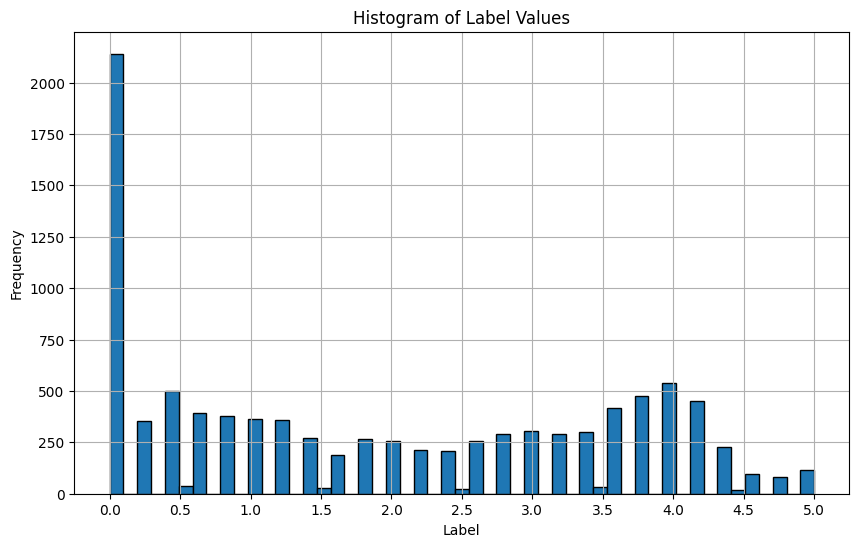

In [4]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(merged_df['label'], bins=51, edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Label Values')
plt.xticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.grid(True)
plt.show()

In [62]:
# label 값이 4.2에서 5.0 사이인 행 전체 추출
increase_data = merged_df[(merged_df['label'] >= 4.2) & (merged_df['label'] <= 5.0)]


In [63]:
len(merged_df[(merged_df['label'] >= 3.5) & (merged_df['label'] <= 4.1)])

1465

In [64]:
len(merged_df)

9874

In [65]:
len(increase_data)

987

In [66]:
increase_data

,id,source,sentence_1,sentence_2,label,binary-label
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
9,boostcamp-sts-v1-train-009,petition-sampled,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여,4.2,1.0
21,boostcamp-sts-v1-train-021,petition-rtt,김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하라!,4.2,1.0
24,boostcamp-sts-v1-train-024,nsmc-rtt,군대가기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 ...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...,4.2,1.0
27,boostcamp-sts-v1-train-027,slack-rtt,"마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ...",4.2,1.0
...,...,...,...,...,...,...
9847,boostcamp-sts-v1-dev-523,petition-rtt,자유학기제 중1에서 중3 총6학기 전체로 확대,자유학기제를 중1에서 중3까지 6학기로 확대,4.4,1.0
9858,boostcamp-sts-v1-dev-534,petition-sampled,미세먼지좀 해결해주세요,미세먼지 좀 해결해주세요.,5.0,1.0
9866,boostcamp-sts-v1-dev-542,slack-rtt,다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다.,다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다.,4.8,1.0
9870,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0


In [10]:
!install default-jdk

install: missing destination file operand after 'default-jdk'
Try 'install --help' for more information.


In [11]:
from konlpy.tag import Mecab
mecab = Mecab()

print(mecab.pos('대한민국 만세 만셈 으어 나는 나넌 너의 친구야.'))

[('대한민국', 'NNP'), ('만세', 'NNG'), ('만', 'JX'), ('셈', 'NNG'), ('으어', 'IC'), ('나', 'NP'), ('는', 'JX'), ('나', 'NP'), ('넌', 'NP+JX'), ('너', 'NP'), ('의', 'JKG'), ('친구', 'NNG'), ('야', 'VCP+EF'), ('.', 'SF')]


In [67]:
# 품사 태그 필터링 함수 작성
def extract_pos_tags(sentence):
    pos_tags = mecab.pos(sentence)
    postpositions = [word for word, tag in pos_tags if tag in ['JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX', 'JC']]
    endings = [word for word, tag in pos_tags if tag in ['EP', 'EF', 'EC', 'ETN', 'ETM']]
    punctuation = [word for word, tag in pos_tags if tag in ['SF', 'SE', 'SSO', 'SSC', 'SC']]
    adverbs = [word for word, tag in pos_tags if tag in ['MAG', 'MAJ']]
    return list(set(postpositions)), list(set(endings)), list(set(punctuation)), list(set(adverbs))  # 중복 제거

# 데이터프레임에 새로운 칼럼 추가
increase_data['Postpositions_1'], increase_data['Endings_1'], increase_data['Punctuation_1'], increase_data['Adverbs_1'] = zip(*increase_data['sentence_1'].apply(extract_pos_tags))
increase_data['Postpositions_2'], increase_data['Endings_2'], increase_data['Punctuation_2'], increase_data['Adverbs_2'] = zip(*increase_data['sentence_2'].apply(extract_pos_tags))

# 칼럼 순서 변경
increase_data = increase_data[['label', 'sentence_1', 'sentence_2', 
                               'Postpositions_1', 'Postpositions_2', 
                               'Endings_1', 'Endings_2', 
                               'Punctuation_1', 'Punctuation_2', 
                               'Adverbs_1', 'Adverbs_2']]

# 최종 데이터프레임 출력
increase_data

/tmp/ipykernel_706215/3317895157.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase_data['Postpositions_1'], increase_data['Endings_1'], increase_data['Punctuation_1'], increase_data['Adverbs_1'] = zip(*increase_data['sentence_1'].apply(extract_pos_tags))
/tmp/ipykernel_706215/3317895157.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase_data['Postpositions_1'], increase_data['Endings_1'], increase_data['Punctuation_1'], increase_data['Adverbs_1'] = zip(*increase_data['sentence_1'].app

,label,sentence_1,sentence_2,Postpositions_1,Postpositions_2,Endings_1,Endings_2,Punctuation_1,Punctuation_2,Adverbs_1,Adverbs_2
1,4.2,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.","[이, 가]",[이],[다고],[다고],[],"[,, .]",[],[]
9,4.2,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여,[],[],[],[도록],[.],[],[],[]
21,4.2,김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하라!,[],[],[],[라],[!],"[·, !]",[철저히],[철저히]
24,4.2,군대가기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 ...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...,"[이, 가, 에, 는]","[에, 을, 는, 이, 으로]","[던, 네요, 은, 면, 는데, 지, 을까, 고]","[죠, 던, 네요, 겠, 은, 기, 는데, 고]",[?],[?],[진짜],[]
27,4.2,"마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ...","[을, 에, 으로, 의]","[를, 의, 을, 에, 으로]","[었, 다는, 습니다, 는데, 며]","[었, 습니다, 어, 고]","[,]","[,, .]",[다시],[다시]
...,...,...,...,...,...,...,...,...,...,...,...
9847,4.4,자유학기제 중1에서 중3 총6학기 전체로 확대,자유학기제를 중1에서 중3까지 6학기로 확대,[로],"[를, 로, 까지]",[],[],[],[],[],[]
9858,5.0,미세먼지좀 해결해주세요,미세먼지 좀 해결해주세요.,[],[],[],[],[],[.],[좀],[좀]
9866,4.8,다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다.,다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다.,[를],[를],"[는, 습니다, 았, 어서, 고]","[는, 습니다, 았, 어서, 고]",[.],[.],[],[]
9870,4.8,(비타민 먹는 장면),(비타민을 먹는 장면),[],[을],[는],[는],"[(, )]","[(, )]",[],[]


In [68]:
# 형태소 분석 함수 작성
def extract_morphs(sentence):
    return mecab.morphs(sentence)

# 데이터프레임에 새로운 칼럼 추가
increase_data['Morphs_1'] = increase_data['sentence_1'].apply(extract_morphs)
increase_data['Morphs_2'] = increase_data['sentence_2'].apply(extract_morphs)

# 차이점 계산 함수 작성
def calculate_difference(row):
    set_1 = set(row['Morphs_1'])
    set_2 = set(row['Morphs_2'])
    difference = list(set_1.symmetric_difference(set_2))
    return difference

# 차이점 칼럼 추가
increase_data['Difference'] = increase_data.apply(calculate_difference, axis=1)

/tmp/ipykernel_706215/2558398536.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase_data['Morphs_1'] = increase_data['sentence_1'].apply(extract_morphs)
/tmp/ipykernel_706215/2558398536.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase_data['Morphs_2'] = increase_data['sentence_2'].apply(extract_morphs)


In [70]:
# 형태소를 {}로 처리한 문장 생성 함수
def mask_morphs(sentence, morphs_to_mask):
    for morph in morphs_to_mask:
        sentence = sentence.replace(morph, '{}')
    return sentence

# 새로운 칼럼 추가 함수
def add_masked_sentences(row):
    morphs_to_mask = row['Difference']
    relevant_morphs = set(row['Postpositions_1'] + row['Postpositions_2'] + row['Endings_1'] + row['Endings_2'] + row['Punctuation_1'] + row['Punctuation_2'] + row['Adverbs_1'] + row['Adverbs_2'])
    morphs_to_mask = [morph for morph in morphs_to_mask if morph in relevant_morphs]
    
    # 우선순위에 따라 마스킹할 형태소 선택
    priority_order = ['Postpositions', 'Adverbs', 'Endings']
    masked_morphs = []

    for priority in priority_order:
        morphs_to_mask_priority_1 = [morph for morph in morphs_to_mask if morph in row[f'{priority}_1']]
        morphs_to_mask_priority_2 = [morph for morph in morphs_to_mask if morph in row[f'{priority}_2']]
        
        if morphs_to_mask_priority_1:
            masked_morphs.append(random.choice(morphs_to_mask_priority_1))
        if morphs_to_mask_priority_2:
            masked_morphs.append(random.choice(morphs_to_mask_priority_2))
        
        if len(masked_morphs) == 2:
            break

    new_sentence_1 = mask_morphs(row['sentence_1'], [masked_morphs[0]]) if masked_morphs else row['sentence_1']
    new_sentence_2 = mask_morphs(row['sentence_2'], [masked_morphs[1]]) if len(masked_morphs) > 1 else row['sentence_2']
    
    return pd.Series([new_sentence_1, new_sentence_2])

# 새로운 칼럼 추가
increase_data[['new_sentence_1', 'new_sentence_2']] = increase_data.apply(add_masked_sentences, axis=1)

# 새로운 데이터프레임 생성
masking_df = increase_data[['label', 'sentence_1', 'sentence_2', 'new_sentence_1', 'new_sentence_2']]


# 필요한 칼럼만 추출하여 새로운 데이터프레임 생성
masked_df = masking_df[['label', 'new_sentence_1', 'new_sentence_2']]

# 최종 데이터프레임 출력
masked_df


,label,new_sentence_1,new_sentence_2
1,4.2,앗 제{} 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다."
9,4.2,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여
21,4.2,김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하라!
24,4.2,군대{}기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨{} 걸고 싸워도 ...
27,4.2,"마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ..."
...,...,...,...
9847,4.4,자유학기제 중1에서 중3 총6학기 전체로 확대,자유학기제를 중1에서 중3까지 6학기로 확대
9858,5.0,미세먼지좀 해결해주세요,미세먼지 좀 해결해주세요.
9866,4.8,다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다.,다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다.
9870,4.8,(비타민 먹는 장면),(비타민을 먹는 장면)


In [71]:
import pandas as pd
from transformers import pipeline

# 형태소를 {}로 처리한 문장 생성 함수
def mask_morphs(sentence, morph):
    return sentence.replace(morph, '{}', 1)

# 새로운 칼럼 추가 함수
def add_masked_sentences(row):
    morphs_to_mask = row['Difference']
    relevant_morphs = set(row['Postpositions_1'] + row['Postpositions_2'] + row['Endings_1'] + row['Endings_2'] + row['Punctuation_1'] + row['Punctuation_2'] + row['Adverbs_1'] + row['Adverbs_2'])
    morphs_to_mask = [morph for morph in morphs_to_mask if morph in relevant_morphs]
    
    # sentence_1에서 마스킹할 형태소 선택
    for priority in ['Postpositions', 'Adverbs', 'Endings']:
        for morph in morphs_to_mask:
            if morph in row[f'{priority}_1']:
                new_sentence_1 = mask_morphs(row['sentence_1'], morph)
                break
        else:
            continue
        break
    else:
        new_sentence_1 = row['sentence_1']
    
    # sentence_2에서 마스킹할 형태소 선택
    for priority in ['Postpositions', 'Adverbs', 'Endings']:
        for morph in morphs_to_mask:
            if morph in row[f'{priority}_2']:
                new_sentence_2 = mask_morphs(row['sentence_2'], morph)
                break
        else:
            continue
        break
    else:
        new_sentence_2 = row['sentence_2']
    
    return pd.Series([new_sentence_1, new_sentence_2])

# 새로운 칼럼 추가
increase_data[['new_sentence_1', 'new_sentence_2']] = increase_data.apply(add_masked_sentences, axis=1)
increase_data

,label,sentence_1,sentence_2,Postpositions_1,Postpositions_2,Endings_1,Endings_2,Punctuation_1,Punctuation_2,Adverbs_1,Adverbs_2,Morphs_1,Morphs_2,Difference,new_sentence_1,new_sentence_2
1,4.2,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.","[이, 가]",[이],[다고],[다고],[],"[,, .]",[],[],"[앗, 제, 가, 접근, 권한, 이, 없, 다고, 뜹니다, ;;]","[오, ,, 액세스, 권한, 이, 없, 다고, 합니다, .]","[액세스, ,, 뜹니다, 제, ;;, 앗, 오, ., 접근, 가, 합니다]",앗 제{} 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다."
9,4.2,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여,[],[],[],[도록],[.],[],[],[],"[크림, 하우스, 환불, 조치, 해, 주, 세요, .]","[크림, 하우스, 환불, 조치, 할, 수, 있, 도록, 해, 주, 세여]","[세여, 도록, 세요, ., 할, 있, 수]",크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있{}해주세여
21,4.2,김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하라!,[],[],[],[라],[!],"[·, !]",[철저히],[철저히],"[김기덕, 조재현, 성폭행, 철저히, 수사, 해, 주, 세요, !]","[김기덕, ·, 조재현, 성폭행, 의혹, 철저히, 수사, 하, 라, !]","[하, 주, 해, 라, 의혹, ·, 세요]",김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하{}!
24,4.2,군대가기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 ...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...,"[이, 가, 에, 는]","[에, 을, 는, 이, 으로]","[던, 네요, 은, 면, 는데, 지, 을까, 고]","[죠, 던, 네요, 겠, 은, 기, 는데, 고]",[?],[?],[진짜],[],"[군대, 가, 기전, 에, 봤었, 는데, 진짜, 윈터스, 같, 은, 사람, 이, 상...","[입대, 하, 기, 전, 에, 봤, 는데, 윈터스, 같, 은, 사람, 이, 진심, ...","[기전, 입대, 을, 겠, 기, 목숨, 걸, 않, 지, 을까, 게, 하, 죠, 아껴...",군대{}기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨{} 걸고 싸워도 ...
27,4.2,"마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ...","[을, 에, 으로, 의]","[를, 의, 을, 에, 으로]","[었, 다는, 습니다, 는데, 며]","[었, 습니다, 어, 고]","[,]","[,, .]",[다시],[다시],"[마지막, 으로, 리모트, 근무, 의, 장점, 에, 대해, 이야기, 했, 는데, ,...","[마지막, 으로, 재택근무, 의, 장점, 에, 대해, 이야기, 를, 나누, 었, 고...","[를, 리모트, ㅎㅎ, 다는, 나누, 어, 하, 재택근무, 점, 근무, 는데, 며,...","마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기{} 나누었고, 시간을 효율적으로 사용할 수..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,4.4,자유학기제 중1에서 중3 총6학기 전체로 확대,자유학기제를 중1에서 중3까지 6학기로 확대,[로],"[를, 로, 까지]",[],[],[],[],[],[],"[자유, 학기제, 중, 1, 에서, 중, 3, 총, 6, 학기, 전체, 로, 확대]","[자유, 학기제, 를, 중, 1, 에서, 중, 3, 까지, 6, 학기, 로, 확대]","[를, 총, 전체, 까지]",자유학기제 중1에서 중3 총6학기 전체로 확대,자유학기제{} 중1에서 중3까지 6학기로 확대
9858,5.0,미세먼지좀 해결해주세요,미세먼지 좀 해결해주세요.,[],[],[],[],[],[.],[좀],[좀],"[미세먼지, 좀, 해결, 해, 주, 세요]","[미세먼지, 좀, 해결, 해, 주, 세요, .]",[.],미세먼지좀 해결해주세요,미세먼지 좀 해결해주세요.
9866,4.8,다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다.,다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다.,[를],[를],"[는, 습니다, 았, 어서, 고]","[는, 습니다, 았, 어서, 고]",[.],[.],[],[],"[다양, 하, 고, 재밌, 는, 얘기, 를, 나눌, 수, 있, 어서, 좋, 았, 습...","[다양, 하, 고, 재미있, 는, 이야기, 를, 나눌, 수, 있, 어서, 좋, 았,...","[재밌, 재미있, 이야기, 얘기]",다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다.,다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다.
9870,4.8,(비타민 먹는 장면),(비타민을 먹는 장면),[],[을],[는],[는],"[(, )]","[(, )]",[],[],"[(, 비타민, 먹, 는, 장면, )]","[(, 비타민, 을, 먹, 는, 장면, )]",[을],(비타민 먹는 장면),(비타민{} 먹는 장면)


In [88]:
import pandas as pd
from transformers import pipeline

# 형태소를 {}로 처리한 문장 생성 함수
def mask_morphs(sentence, morph):
    return sentence.replace(morph, '{}', 1)

# 새로운 칼럼 추가 함수
def add_masked_sentences(row):
    morphs_to_mask = row['Difference']
    relevant_morphs = set(row['Postpositions_1'] + row['Postpositions_2'] + row['Endings_1'] + row['Endings_2'] + row['Punctuation_1'] + row['Punctuation_2'] + row['Adverbs_1'] + row['Adverbs_2'])
    morphs_to_mask = [morph for morph in morphs_to_mask if morph in relevant_morphs]
    
    def mask_sentence(sentence, morphs, priorities):
        for priority in priorities:
            for morph in morphs:
                if morph in row[f'{priority}_1']:
                    return mask_morphs(sentence, morph)
        if morphs:
            return mask_morphs(sentence, morphs[0])
        return sentence + ' {}'
    
    new_sentence_1 = mask_sentence(row['sentence_1'], morphs_to_mask, ['Postpositions', 'Adverbs', 'Endings'])
    new_sentence_2 = mask_sentence(row['sentence_2'], morphs_to_mask, ['Postpositions', 'Adverbs', 'Endings'])
    
    return pd.Series([new_sentence_1, new_sentence_2])

# 새로운 칼럼 추가
increase_data[['new_sentence_1', 'new_sentence_2']] = increase_data.apply(add_masked_sentences, axis=1)
increase_data


,label,sentence_1,sentence_2,Postpositions_1,Postpositions_2,Endings_1,Endings_2,Punctuation_1,Punctuation_2,Adverbs_1,Adverbs_2,Morphs_1,Morphs_2,Difference,new_sentence_1,new_sentence_2
1,4.2,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.","[이, 가]",[이],[다고],[다고],[],"[,, .]",[],[],"[앗, 제, 가, 접근, 권한, 이, 없, 다고, 뜹니다, ;;]","[오, ,, 액세스, 권한, 이, 없, 다고, 합니다, .]","[액세스, ,, 뜹니다, 제, ;;, 앗, 오, ., 접근, 가, 합니다]",앗 제{} 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다."
9,4.2,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여,[],[],[],[도록],[.],[],[],[],"[크림, 하우스, 환불, 조치, 해, 주, 세요, .]","[크림, 하우스, 환불, 조치, 할, 수, 있, 도록, 해, 주, 세여]","[세여, 도록, 세요, ., 할, 있, 수]",크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있{}해주세여
21,4.2,김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하라!,[],[],[],[라],[!],"[·, !]",[철저히],[철저히],"[김기덕, 조재현, 성폭행, 철저히, 수사, 해, 주, 세요, !]","[김기덕, ·, 조재현, 성폭행, 의혹, 철저히, 수사, 하, 라, !]","[하, 주, 해, 라, 의혹, ·, 세요]",김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하{}!
24,4.2,군대가기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 ...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...,"[이, 가, 에, 는]","[에, 을, 는, 이, 으로]","[던, 네요, 은, 면, 는데, 지, 을까, 고]","[죠, 던, 네요, 겠, 은, 기, 는데, 고]",[?],[?],[진짜],[],"[군대, 가, 기전, 에, 봤었, 는데, 진짜, 윈터스, 같, 은, 사람, 이, 상...","[입대, 하, 기, 전, 에, 봤, 는데, 윈터스, 같, 은, 사람, 이, 진심, ...","[기전, 입대, 을, 겠, 기, 목숨, 걸, 않, 지, 을까, 게, 하, 죠, 아껴...",군대{}기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...
27,4.2,"마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ...","[을, 에, 으로, 의]","[를, 의, 을, 에, 으로]","[었, 다는, 습니다, 는데, 며]","[었, 습니다, 어, 고]","[,]","[,, .]",[다시],[다시],"[마지막, 으로, 리모트, 근무, 의, 장점, 에, 대해, 이야기, 했, 는데, ,...","[마지막, 으로, 재택근무, 의, 장점, 에, 대해, 이야기, 를, 나누, 었, 고...","[를, 리모트, ㅎㅎ, 다는, 나누, 어, 하, 재택근무, 점, 근무, 는데, 며,...","마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,4.4,자유학기제 중1에서 중3 총6학기 전체로 확대,자유학기제를 중1에서 중3까지 6학기로 확대,[로],"[를, 로, 까지]",[],[],[],[],[],[],"[자유, 학기제, 중, 1, 에서, 중, 3, 총, 6, 학기, 전체, 로, 확대]","[자유, 학기제, 를, 중, 1, 에서, 중, 3, 까지, 6, 학기, 로, 확대]","[를, 총, 전체, 까지]",자유학기제 중1에서 중3 총6학기 전체로 확대,자유학기제{} 중1에서 중3까지 6학기로 확대
9858,5.0,미세먼지좀 해결해주세요,미세먼지 좀 해결해주세요.,[],[],[],[],[],[.],[좀],[좀],"[미세먼지, 좀, 해결, 해, 주, 세요]","[미세먼지, 좀, 해결, 해, 주, 세요, .]",[.],미세먼지좀 해결해주세요,미세먼지 좀 해결해주세요{}
9866,4.8,다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다.,다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다.,[를],[를],"[는, 습니다, 았, 어서, 고]","[는, 습니다, 았, 어서, 고]",[.],[.],[],[],"[다양, 하, 고, 재밌, 는, 얘기, 를, 나눌, 수, 있, 어서, 좋, 았, 습...","[다양, 하, 고, 재미있, 는, 이야기, 를, 나눌, 수, 있, 어서, 좋, 았,...","[재밌, 재미있, 이야기, 얘기]",다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다. {},다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다. {}
9870,4.8,(비타민 먹는 장면),(비타민을 먹는 장면),[],[을],[는],[는],"[(, )]","[(, )]",[],[],"[(, 비타민, 먹, 는, 장면, )]","[(, 비타민, 을, 먹, 는, 장면, )]",[을],(비타민 먹는 장면),(비타민{} 먹는 장면)


In [87]:
import pandas as pd
from transformers import pipeline

# 형태소를 {}로 처리한 문장 생성 함수
def mask_morphs(sentence, morph):
    return sentence.replace(morph, '{}', 1)

# 새로운 칼럼 추가 함수
def add_masked_sentences(row):
    morphs_to_mask = [morph for morph in row['Difference'] if morph in set(row['Postpositions_1'] + row['Postpositions_2'] + row['Endings_1'] + row['Endings_2'] + row['Punctuation_1'] + row['Punctuation_2'] + row['Adverbs_1'] + row['Adverbs_2'])]
    
    def mask_sentence(sentence, morphs, priorities):
        for priority in priorities:
            for morph in morphs:
                if morph in row[f'{priority}_1']:
                    sentence = mask_morphs(sentence, morph)
                    break
            else:
                continue
            break
        if '{}' not in sentence:
            sentence += '{}'
        return sentence
    
    new_sentence_1 = mask_sentence(row['sentence_1'], morphs_to_mask, ['Adverbs', 'Postpositions', 'Endings'])
    new_sentence_2 = mask_sentence(row['sentence_2'], morphs_to_mask, ['Adverbs', 'Postpositions', 'Endings'])
    
    return pd.Series([new_sentence_1, new_sentence_2])

# 새로운 칼럼 추가
increase_data[['new_sentence_1', 'new_sentence_2']] = increase_data.apply(add_masked_sentences, axis=1)
increase_data

# fill-mask 파이프라인 설정
fill_mask = pipeline(
    "fill-mask",
    model="monologg/koelectra-base-v3-generator",
    tokenizer="monologg/koelectra-base-v3-generator"
)

# fill-mask 결과를 추가하는 함수
def apply_fill_mask(row):
    fill_mask_1 = fill_mask(row['new_sentence_1'].format(fill_mask.tokenizer.mask_token))
    fill_mask_2 = fill_mask(row['new_sentence_2'].format(fill_mask.tokenizer.mask_token))
    
    # 결과가 원래 문장과 일치하지 않으면 다음 행으로 넘어감
    for i in range(5):
        if fill_mask_1[i]['sequence'] != row['sentence_1']:
            row['fill_mask_1'] = fill_mask_1[i]['sequence']
            break
    else:
        row['fill_mask_1'] = row['sentence_1']
    
    for i in range(5):
        if fill_mask_2[i]['sequence'] != row['sentence_2']:
            row['fill_mask_2'] = fill_mask_2[i]['sequence']
            break
    else:
        row['fill_mask_2'] = row['sentence_2']
    
    return row

# fill-mask 결과를 추가
masking_df = increase_data.apply(apply_fill_mask, axis=1)


masking_df

,label,sentence_1,sentence_2,Postpositions_1,Postpositions_2,Endings_1,Endings_2,Punctuation_1,Punctuation_2,Adverbs_1,Adverbs_2,Morphs_1,Morphs_2,Difference,new_sentence_1,new_sentence_2,fill_mask_1,fill_mask_2
1,4.2,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.","[이, 가]",[이],[다고],[다고],[],"[,, .]",[],[],"[앗, 제, 가, 접근, 권한, 이, 없, 다고, 뜹니다, ;;]","[오, ,, 액세스, 권한, 이, 없, 다고, 합니다, .]","[액세스, ,, 뜹니다, 제, ;;, 앗, 오, ., 접근, 가, 합니다]",앗 제{} 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.{}",앗 제가 접근권한이 없다고 뜹니다 ; ;,"오, 액세스 권한이 없다고 합니다.."
9,4.2,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여,[],[],[],[도록],[.],[],[],[],"[크림, 하우스, 환불, 조치, 해, 주, 세요, .]","[크림, 하우스, 환불, 조치, 할, 수, 있, 도록, 해, 주, 세여]","[세여, 도록, 세요, ., 할, 있, 수]",크림하우스 환불조치해주세요.{},크림하우스 환불조치할 수 있도록해주세여{},크림하우스 환불조치해주세요.!,크림하우스 환불조치할 수 있도록해주세여.
21,4.2,김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하라!,[],[],[],[라],[!],"[·, !]",[철저히],[철저히],"[김기덕, 조재현, 성폭행, 철저히, 수사, 해, 주, 세요, !]","[김기덕, ·, 조재현, 성폭행, 의혹, 철저히, 수사, 하, 라, !]","[하, 주, 해, 라, 의혹, ·, 세요]",김기덕 조재현 성폭행 철저히 수사해주세요!{},김기덕·조재현 성폭행 의혹 철저히 수사하라!{},김기덕 조재현 성폭행 철저히 수사해주세요!!,김기덕 · 조재현 성폭행 의혹 철저히 수사하라!!
24,4.2,군대가기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 ...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...,"[이, 가, 에, 는]","[에, 을, 는, 이, 으로]","[던, 네요, 은, 면, 는데, 지, 을까, 고]","[죠, 던, 네요, 겠, 은, 기, 는데, 고]",[?],[?],[진짜],[],"[군대, 가, 기전, 에, 봤었, 는데, 진짜, 윈터스, 같, 은, 사람, 이, 상...","[입대, 하, 기, 전, 에, 봤, 는데, 윈터스, 같, 은, 사람, 이, 진심, ...","[기전, 입대, 을, 겠, 기, 목숨, 걸, 않, 지, 을까, 게, 하, 죠, 아껴...",군대가기전에 봤었는데 {} 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 ...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...,"군대가기전에 봤었는데, 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 않을...",입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...
27,4.2,"마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ...","[을, 에, 으로, 의]","[를, 의, 을, 에, 으로]","[었, 다는, 습니다, 는데, 며]","[었, 습니다, 어, 고]","[,]","[,, .]",[다시],[다시],"[마지막, 으로, 리모트, 근무, 의, 장점, 에, 대해, 이야기, 했, 는데, ,...","[마지막, 으로, 재택근무, 의, 장점, 에, 대해, 이야기, 를, 나누, 었, 고...","[를, 리모트, ㅎㅎ, 다는, 나누, 어, 하, 재택근무, 점, 근무, 는데, 며,...","마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ...","마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,4.4,자유학기제 중1에서 중3 총6학기 전체로 확대,자유학기제를 중1에서 중3까지 6학기로 확대,[로],"[를, 로, 까지]",[],[],[],[],[],[],"[자유, 학기제, 중, 1, 에서, 중, 3, 총, 6, 학기, 전체, 로, 확대]","[자유, 학기제, 를, 중, 1, 에서, 중, 3, 까지, 6, 학기, 로, 확대]","[를, 총, 전체, 까지]",자유학기제 중1에서 중3 총6학기 전체로 확대{},자유학기제를 중1에서 중3까지 6학기로 확대{},자유학기제 중1에서 중3 총6학기 전체로 확대.,자유학기제를 중1에서 중3까지 6학기로 확대한다
9858,5.0,미세먼지좀 해결해주세요,미세먼지 좀 해결해주세요.,[],[],[],[],[],[.],[좀],[좀],"[미세먼지, 좀, 해결, 해, 주, 세요]","[미세먼지, 좀, 해결, 해, 주, 세요, .]",[.],미세먼지좀 해결해주세요{},미세먼지 좀 해결해주세요.{},미세먼지좀 해결해주세요.,미세먼지 좀 해결해주세요..
9866,4.8,다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다.,다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다.,[를],[를],"[는, 습니다, 았, 어서, 고]","[는, 습니다, 았, 어서, 고]",[.],[.],[],[],"[다양, 하, 고, 재밌, 는, 얘기, 를, 나눌, 수, 있, 어서, 좋, 았, 습...","[다양, 하, 고, 재미있, 는, 이야기, 를, 나눌, 수, 있, 어서, 좋, 았,...","[재밌, 재미있, 이야기, 얘기]",다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다.{},다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다.{},"다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다. ""","다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다. """
9870,4.8,(비타민 먹는 장면),(비타민을 먹는 장면),[],[을],[는],[는],"[(, )]","[(, )]",[],[],"[(, 비타민, 먹, 는, 장면, )]","[(, 비타민, 을, 먹, 는, 장면, )]",[을],(비타민 먹는 장면){},(비타민을 먹는 장면){},( 비타민 먹는 장면 ).,( 비타민을 먹는 장면 ).


In [89]:
# 최종 데이터프레임 출력
original = masking_df[['label', 'sentence_1', 'sentence_2']]

In [90]:
add_df = masking_df[['label', 'fill_mask_1', 'fill_mask_2']]

In [91]:
# fill_mask_1과 fill_mask_2의 칼럼 이름을 변경
add_df = add_df.rename(columns={'fill_mask_1': 'sentence_1', 'fill_mask_2': 'sentence_2'})

# 두 DataFrame을 행 방향으로 결합
combined_df = pd.concat([original, add_df], axis=0, ignore_index=True)

# 결과 출력
combined_df


,label,sentence_1,sentence_2
0,4.2,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다."
1,4.2,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여
2,4.2,김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하라!
3,4.2,군대가기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 ...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...
4,4.2,"마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ..."
...,...,...,...
1969,4.4,자유학기제 중1에서 중3 총6학기 전체로 확대.,자유학기제를 중1에서 중3까지 6학기로 확대한다
1970,5.0,미세먼지좀 해결해주세요.,미세먼지 좀 해결해주세요..
1971,4.8,"다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다. ""","다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다. """
1972,4.8,( 비타민 먹는 장면 ).,( 비타민을 먹는 장면 ).


In [83]:
pd.

,label,sentence_1,sentence_2
1924,4.6,화재연기감지기 오피스텔 내 오작동 관련 인명피해 에 대한 대책마련,오피스텔 화재화재감지기 오동작으로 인한 인명피해 대책 마련 필요
1925,4.8,제 와이프는 간호조무사였습니다..,"제 아내는 간호 조무사였습니다. """
1926,5.0,크 여행 떠나고 싶다 요오 ; ㅁ ;,크 여행떠나고싶다 요 ~ ~
1927,4.8,그의 등장만으로 눈물이 날뻔 했다.,"그의 등장만으로도 눈물이 날 뻔했다. """
1928,4.8,조두순 출소를 반대합니다..,조두순 출소를 반대합니다!!
1929,5.0,이명박 출국금지 청원합니다,이명박 출국 금지 청원합니다
1930,4.5,미세먼지 대책세워주세요!,미세먼지 대책 세워주십시오.
1931,4.4,대통령님 제 2의 촛불의 희생자가 당신이 될수도있습니다,"대통령, 당신은 두 번째 촛불의 희생자가 될 수 있습니다."
1932,4.8,아 그렇군요!! ㅎ ㅎ,아 ㅋㅋ 그렇군요!!
1933,4.2,"오복수산에서 카이센동을 먹었는데요, 우니와 참치는 조합이 예술이었습니다",오복수산에서 가이센동 먹었는데 우니와 참치 조합이 예술.


In [92]:
import pandas as pd

# CSV 파일 읽기
train_df = pd.read_csv('/data/ephemeral/hsk/level1-semantictextsimilarity-nlp-01/data/train.csv')

# fill_mask_1과 fill_mask_2의 칼럼 이름을 변경
add_df = add_df.rename(columns={'fill_mask_1': 'sentence_1', 'fill_mask_2': 'sentence_2'})

# 두 DataFrame을 행 방향으로 결합
combined_df = pd.concat([train_df, add_df], axis=0, ignore_index=True)

# 결측치를 빈 문자열로 대체
combined_df = combined_df.fillna('')

# 결과 출력
combined_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
10306,,,자유학기제 중1에서 중3 총6학기 전체로 확대.,자유학기제를 중1에서 중3까지 6학기로 확대한다,4.4,
10307,,,미세먼지좀 해결해주세요.,미세먼지 좀 해결해주세요..,5.0,
10308,,,"다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다. ""","다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다. """,4.8,
10309,,,( 비타민 먹는 장면 ).,( 비타민을 먹는 장면 ).,4.8,


In [93]:
# 결과 출력
combined_df.to_csv('/data/ephemeral/hsk/level1-semantictextsimilarity-nlp-01/data/combined_train.csv', index=False)

# 결합된 DataFrame 확인
print(combined_df)

                               id            source  \
0      boostcamp-sts-v1-train-000      nsmc-sampled   
1      boostcamp-sts-v1-train-001         slack-rtt   
2      boostcamp-sts-v1-train-002  petition-sampled   
3      boostcamp-sts-v1-train-003     slack-sampled   
4      boostcamp-sts-v1-train-004     slack-sampled   
...                           ...               ...   
10306                                                 
10307                                                 
10308                                                 
10309                                                 
10310                                                 

                                    sentence_1  \
0       스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~   
1                         앗 제가 접근권한이 없다고 뜹니다;;   
2                               주택청약조건 변경해주세요.   
3                       입사후 처음 대면으로 만나 반가웠습니다.   
4                                   뿌듯뿌듯 하네요!!   
...                                    

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
10306,NaN,NaN,자유학기제 중1에서 중3 총6학기 전체로 확대.,자유학기제를 중1에서 중3까지 6학기로 확대한다,4.4,NaN
10307,NaN,NaN,미세먼지좀 해결해주세요.,미세먼지 좀 해결해주세요..,5.0,NaN
10308,NaN,NaN,"다양하고 재밌는 얘기를 나눌 수 있어서 좋았습니다. ""","다양하고 재미있는 이야기를 나눌 수 있어서 좋았습니다. """,4.8,NaN
10309,NaN,NaN,( 비타민 먹는 장면 ).,( 비타민을 먹는 장면 ).,4.8,NaN


In [50]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="monologg/koelectra-base-v3-generator",
    tokenizer="monologg/koelectra-base-v3-generator"
)

result = fill_mask("의료계 환경 개선 {} 경찰소방공무원 지원해주세요".format(fill_mask.tokenizer.mask_token))

result[0]['sequence']
result[1]['sequence']
result[2]['sequence']
result[3]['sequence']
result[4]['sequence']

# print(fill_mask("의료계 환경 개선 {} 경찰소방공무원 지원해주세요".format(fill_mask.tokenizer.mask_token)))


'의료계 환경 개선 및 경찰소방공무원 지원해주세요'

In [46]:
from transformers import ElectraForMaskedLM, ElectraTokenizer
import torch

# 모델과 토크나이저 로드
model = ElectraForMaskedLM.from_pretrained("monologg/koelectra-base-v3-generator")
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-generator")

# 입력 문장
sentence = "의료계 환경 개선 {} 경찰소방공무원 지원해주세요".format(tokenizer.mask_token)
inputs = tokenizer(sentence, return_tensors="pt")

# 예측
with torch.no_grad():
    logits = model(**inputs).logits

# 마스크된 토큰의 위치
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]

# 상위 5개 예측 결과
top_k = 5
mask_token_logits = logits[0, mask_token_index, :]
top_tokens = torch.topk(mask_token_logits, top_k, dim=1).indices[0].tolist()

for token in top_tokens:
    print(tokenizer.decode([token]))

위해
,
##시
##과
및


In [25]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="monologg/kobigbird-bert-base")

Some weights of the model checkpoint at monologg/kobigbird-bert-base were not used when initializing BigBirdForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BigBirdForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [47]:
pipe("의료계 환경 개선 [MASK] 경찰소방공무원 지원해주세요")

[{'score': 0.30424705147743225,
  'token': 516,
  'token_str': ',',
  'sequence': '의료계 환경 개선, 경찰소방공무원 지원해주세요'},
 {'score': 0.09702486544847488,
  'token': 3240,
  'token_str': '및',
  'sequence': '의료계 환경 개선 및 경찰소방공무원 지원해주세요'},
 {'score': 0.09511928260326385,
  'token': 6810,
  'token_str': '위해',
  'sequence': '의료계 환경 개선 위해 경찰소방공무원 지원해주세요'},
 {'score': 0.08805422484874725,
  'token': 517,
  'token_str': '-',
  'sequence': '의료계 환경 개선 - 경찰소방공무원 지원해주세요'},
 {'score': 0.02381720393896103,
  'token': 530,
  'token_str': ':',
  'sequence': '의료계 환경 개선 : 경찰소방공무원 지원해주세요'}]